Number of clusters (excluding noise): 2
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0  1
Labels          
0         542  7
1         342  0
Are classes well separated into individual clusters?: True
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: False


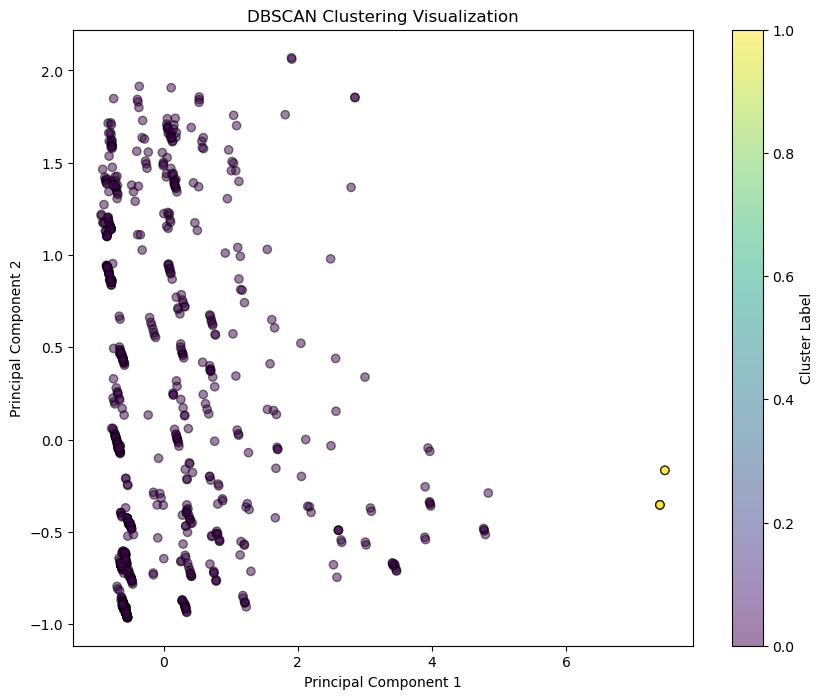

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
import sklearn.metrics

# Load and preprocess the data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
    embarked = pd.get_dummies(data['Embarked'])
    scaler = MinMaxScaler(feature_range=(-1, 1))
    norm = pd.DataFrame(scaler.fit_transform(data[['Age', 'Fare']]), data.index, columns=['norm_Age', 'norm_Fare'])
    data = pd.concat([data.drop(columns=['Embarked', 'Age', 'Fare']), embarked, norm], axis=1)
    data['norm_Age'] = data['norm_Age'].fillna(data['norm_Age'].median())
    data['Sex'] = np.vectorize(lambda x: True if x == 'male' else False)(data['Sex'])
    data.set_index(['PassengerId'], inplace=True)
    data.sort_index(inplace=True)
    return data, labels

# Perform DBSCAN clustering and analyze
def dbscan_and_analyze(data, labels, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    
    # Check if all points are noise
    if len(set(clusters)) == 1 and -1 in clusters:
        print("All points classified as noise. Try adjusting eps and min_samples.")
        return

    # Analyze clusters
    comparison_df = pd.DataFrame({'Labels': labels, 'Clusters': clusters})
    cross_tab = pd.crosstab(comparison_df['Labels'], comparison_df['Clusters'])
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_classes = len(set(labels))

    print("Number of clusters (excluding noise):", num_clusters)
    print("Number of classes:", num_classes)
    print("Cross-tabulation of labels and clusters:\n", cross_tab)
    print("Are classes well separated into individual clusters?:", num_clusters == num_classes)
    print("Do some classes correspond to several clusters?:", cross_tab.apply(lambda x: x > 0).sum(axis=1).max() > 1)
    print("Are class labels completely irrelevant to the clusters formed?:", num_clusters != num_classes)
    
    # Visualize clusters
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.5, edgecolor='k')
    plt.title('DBSCAN Clustering Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

file_path = 'Titanic-Dataset.csv'  
titanic_data, labels = load_and_preprocess(file_path)
dbscan_and_analyze(titanic_data, labels, eps=3, min_samples=5)

Testing DBSCAN with eps=2 and min_samples=3
Number of clusters (excluding noise): 2
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters  -1    0   1
Labels               
0          1  541   7
1          0  342   0
Are classes well separated into individual clusters?: True
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: False


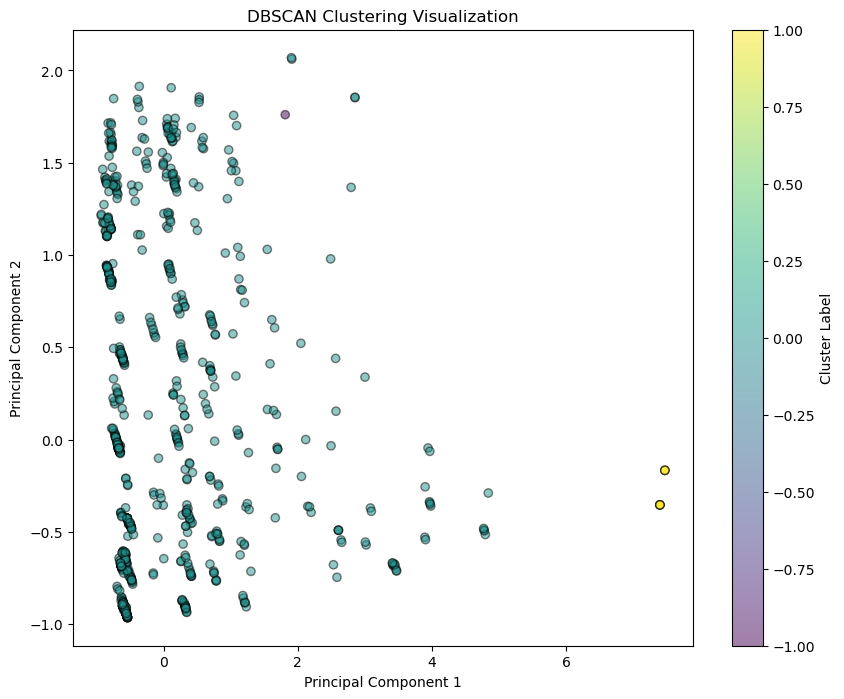

Testing DBSCAN with eps=2 and min_samples=5
Number of clusters (excluding noise): 2
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters  -1    0   1
Labels               
0          1  541   7
1          0  342   0
Are classes well separated into individual clusters?: True
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: False


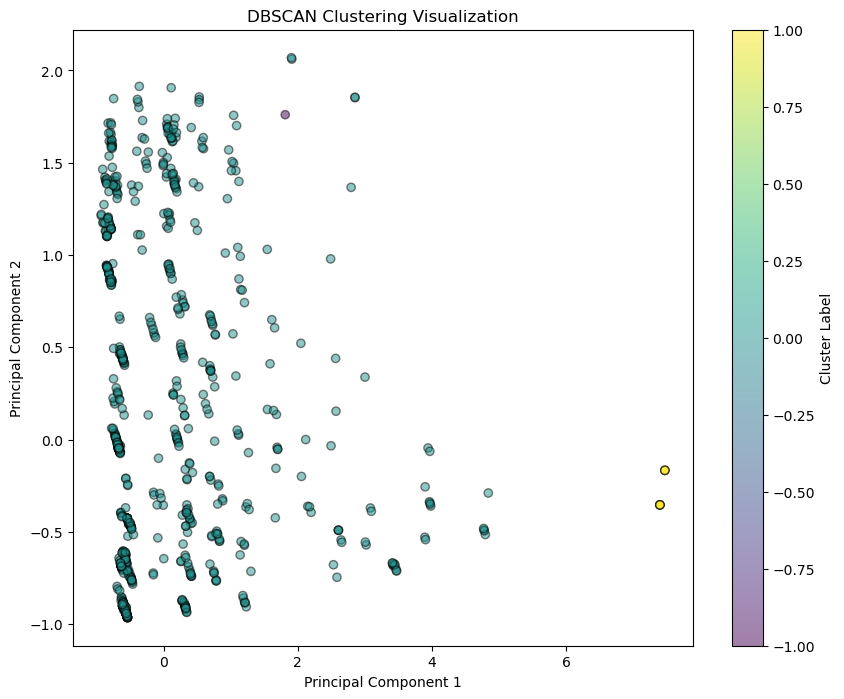

Testing DBSCAN with eps=2 and min_samples=10
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters  -1    0
Labels           
0          9  540
1          0  342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: True


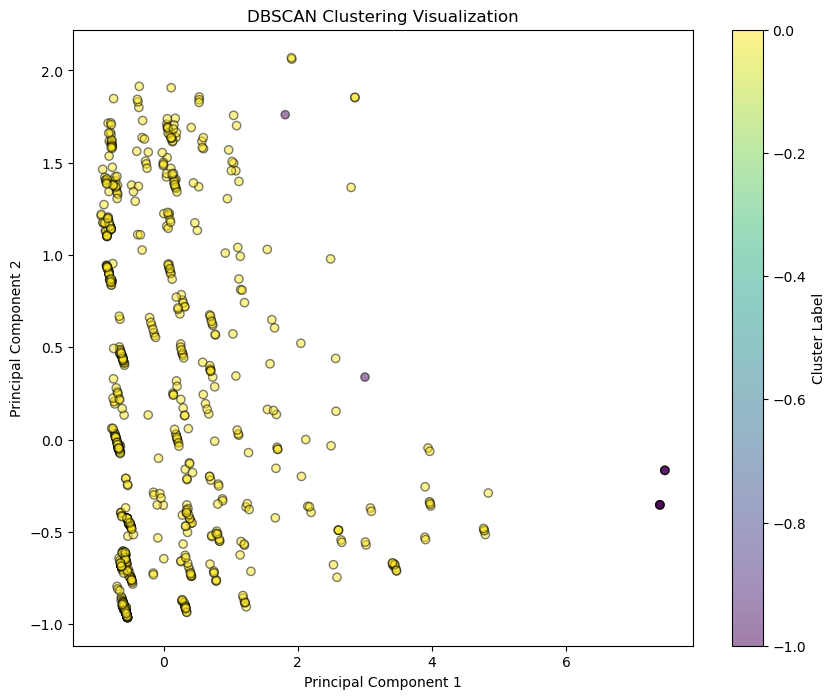

Testing DBSCAN with eps=3 and min_samples=3
Number of clusters (excluding noise): 2
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0  1
Labels          
0         542  7
1         342  0
Are classes well separated into individual clusters?: True
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: False


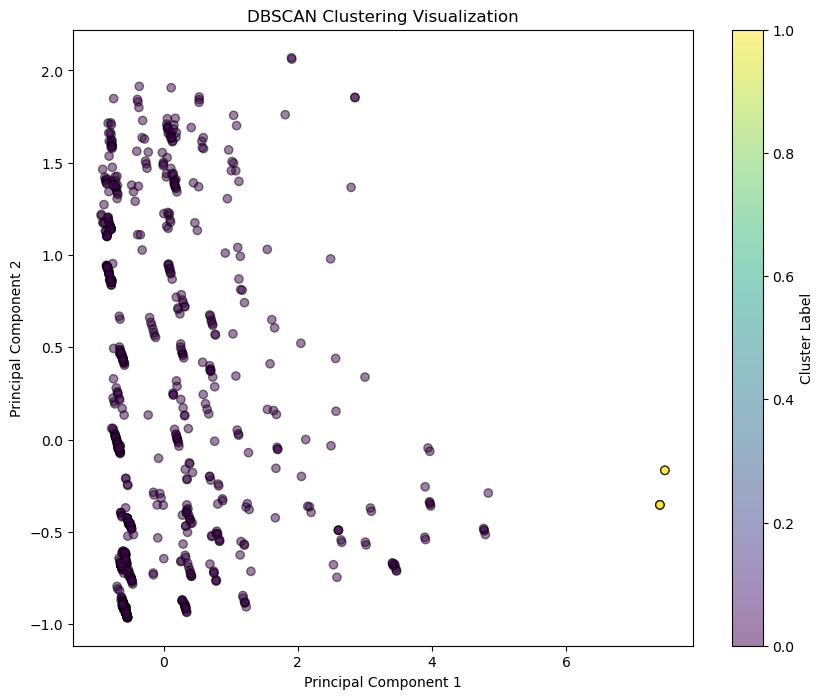

Testing DBSCAN with eps=3 and min_samples=5
Number of clusters (excluding noise): 2
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0  1
Labels          
0         542  7
1         342  0
Are classes well separated into individual clusters?: True
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: False


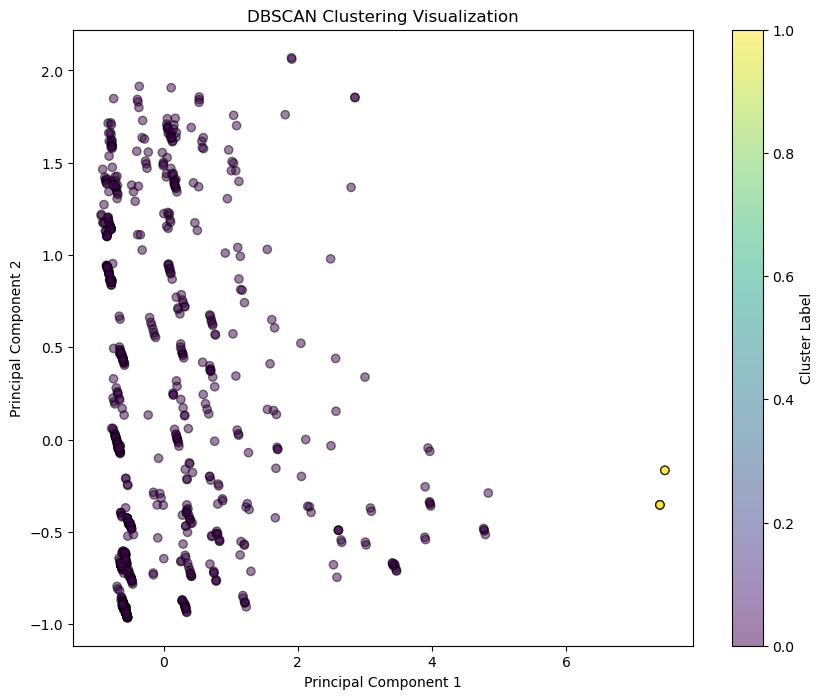

Testing DBSCAN with eps=3 and min_samples=10
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters  -1    0
Labels           
0          7  542
1          0  342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: True


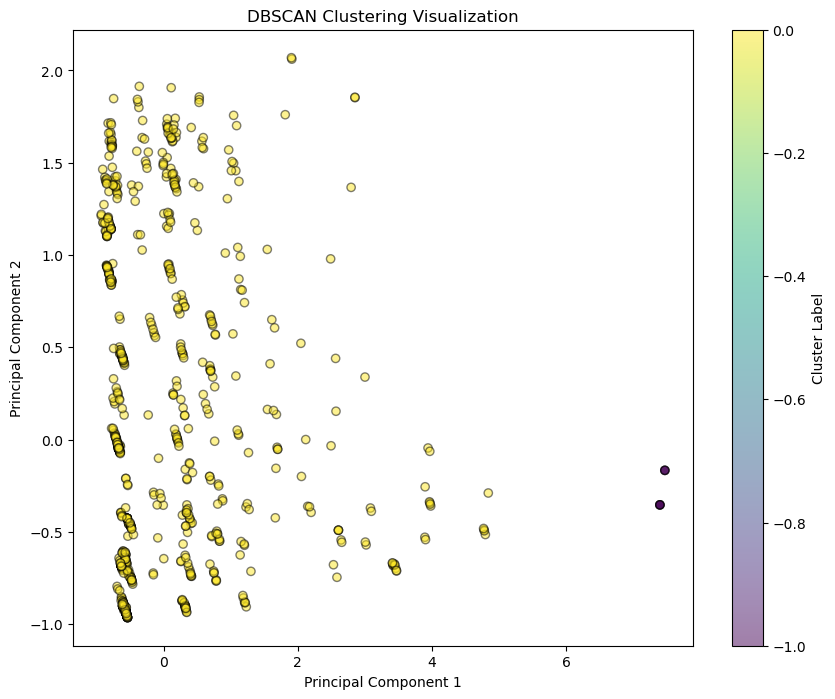

Testing DBSCAN with eps=4 and min_samples=3
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0
Labels       
0         549
1         342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: False
Are class labels completely irrelevant to the clusters formed?: True


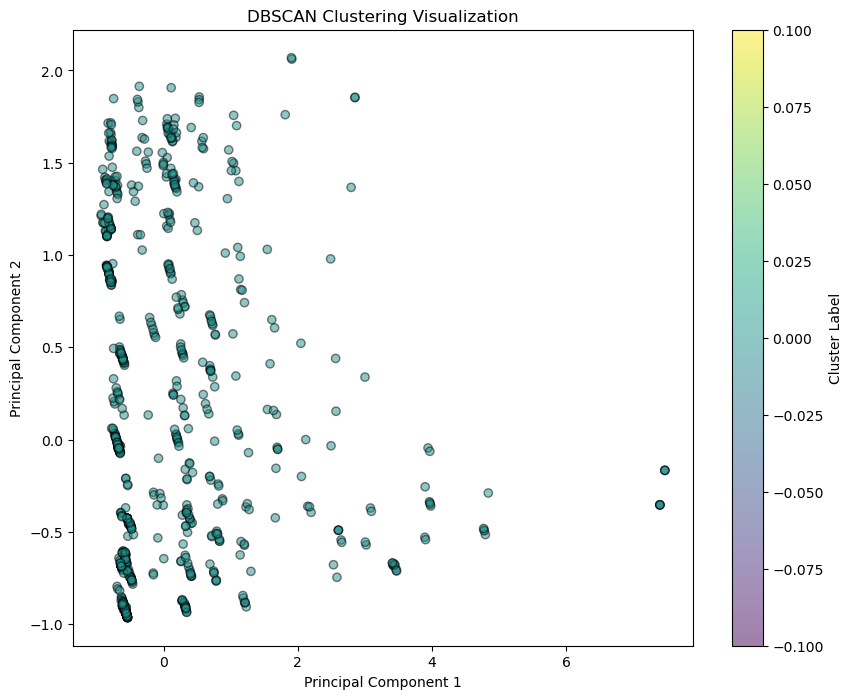

Testing DBSCAN with eps=4 and min_samples=5
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0
Labels       
0         549
1         342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: False
Are class labels completely irrelevant to the clusters formed?: True


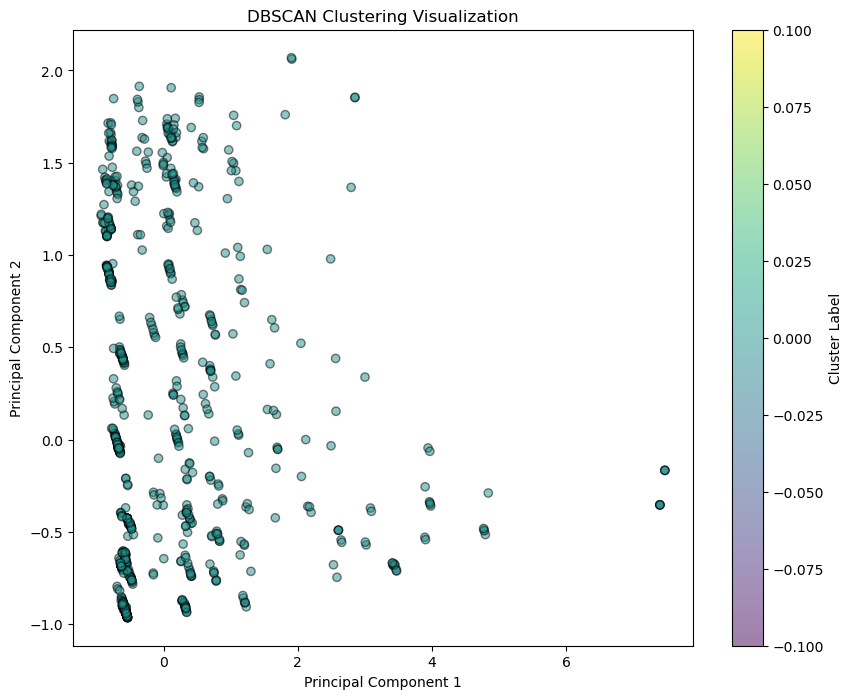

Testing DBSCAN with eps=4 and min_samples=10
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0
Labels       
0         549
1         342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: False
Are class labels completely irrelevant to the clusters formed?: True


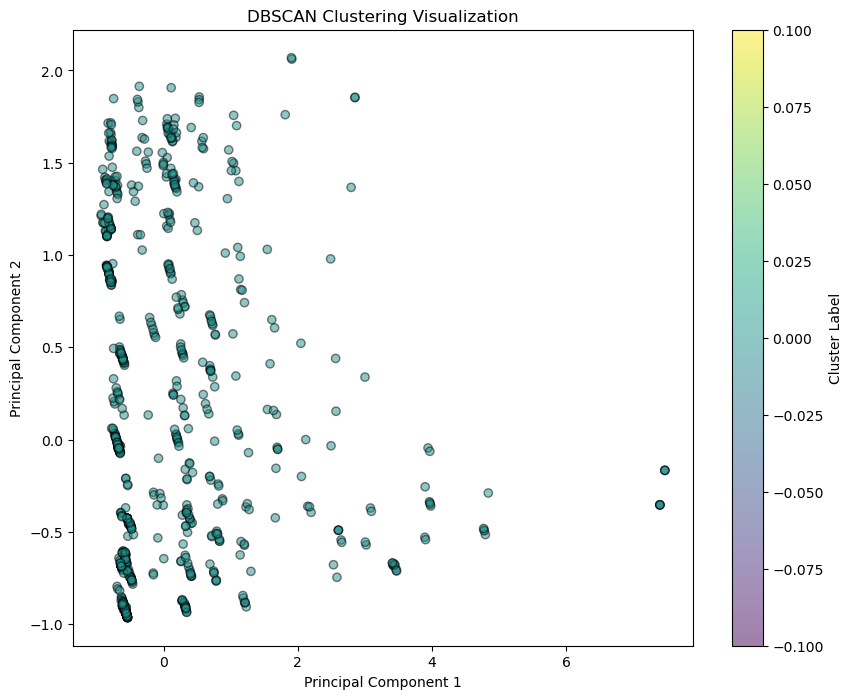

Testing DBSCAN with eps=5 and min_samples=3
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0
Labels       
0         549
1         342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: False
Are class labels completely irrelevant to the clusters formed?: True


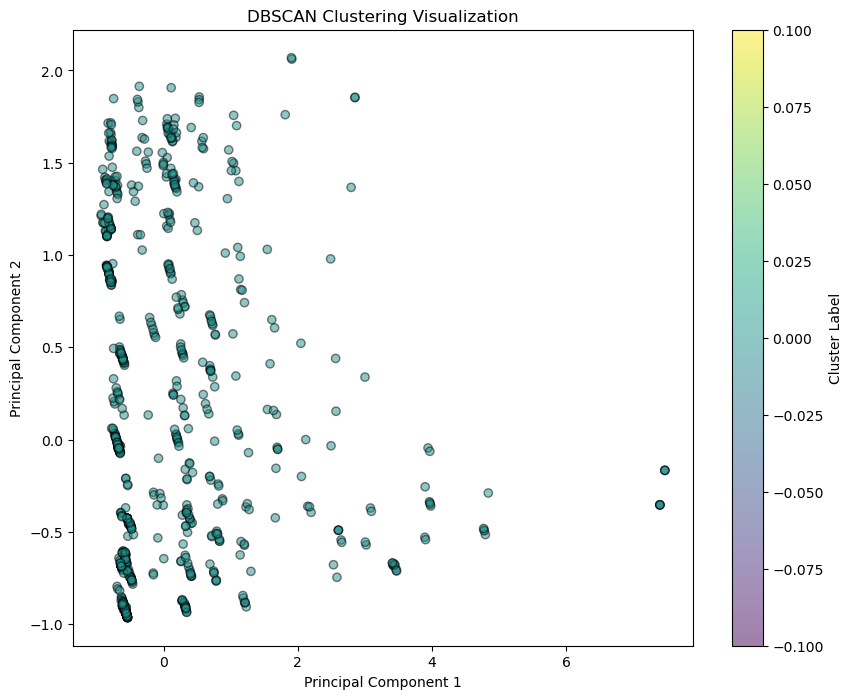

Testing DBSCAN with eps=5 and min_samples=5
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0
Labels       
0         549
1         342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: False
Are class labels completely irrelevant to the clusters formed?: True


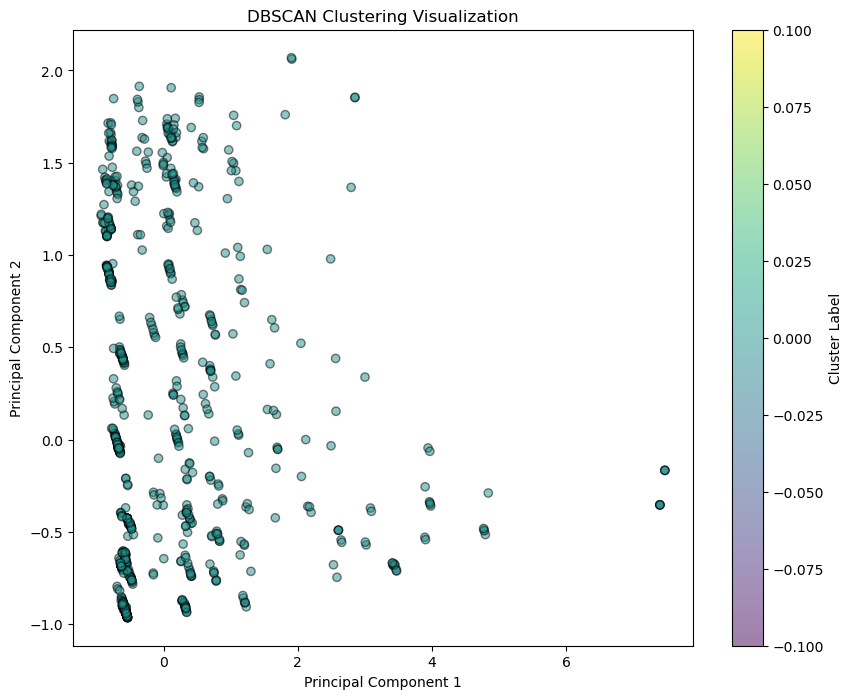

Testing DBSCAN with eps=5 and min_samples=10
Number of clusters (excluding noise): 1
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters    0
Labels       
0         549
1         342
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: False
Are class labels completely irrelevant to the clusters formed?: True


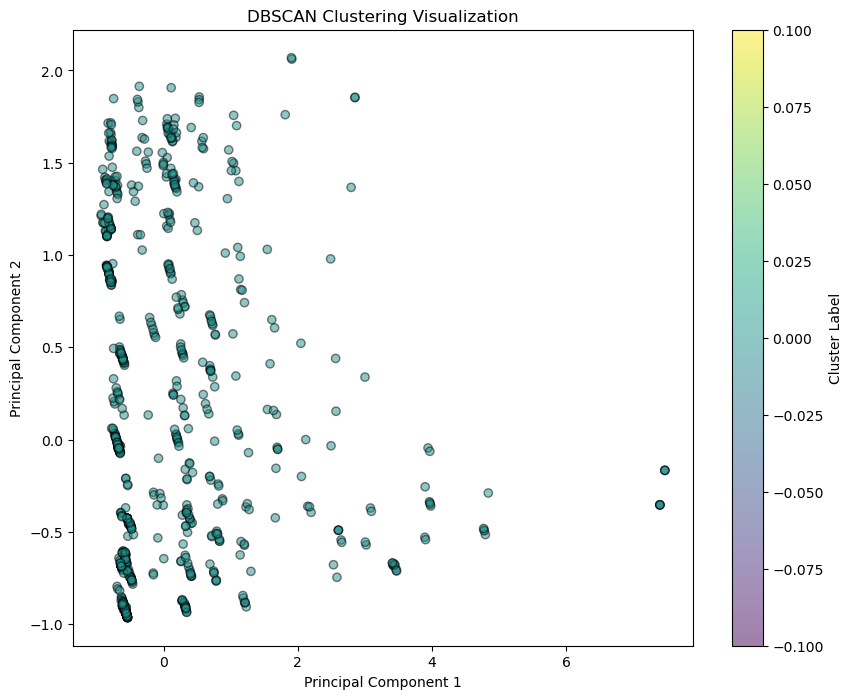

In [9]:
# Try different values of eps and min_samples
for eps_value in [2, 3, 4, 5]:  # Increasing eps
    for min_samples_value in [3, 5, 10]:  # Adjusting min_samples
        print(f"Testing DBSCAN with eps={eps_value} and min_samples={min_samples_value}")
        dbscan_and_analyze(titanic_data, labels, eps=eps_value, min_samples=min_samples_value)

Number of clusters (excluding noise): 2
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters  -1    0   1
Labels               
0          2  540   7
1          4  338   0
Are classes well separated into individual clusters?: True
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: False


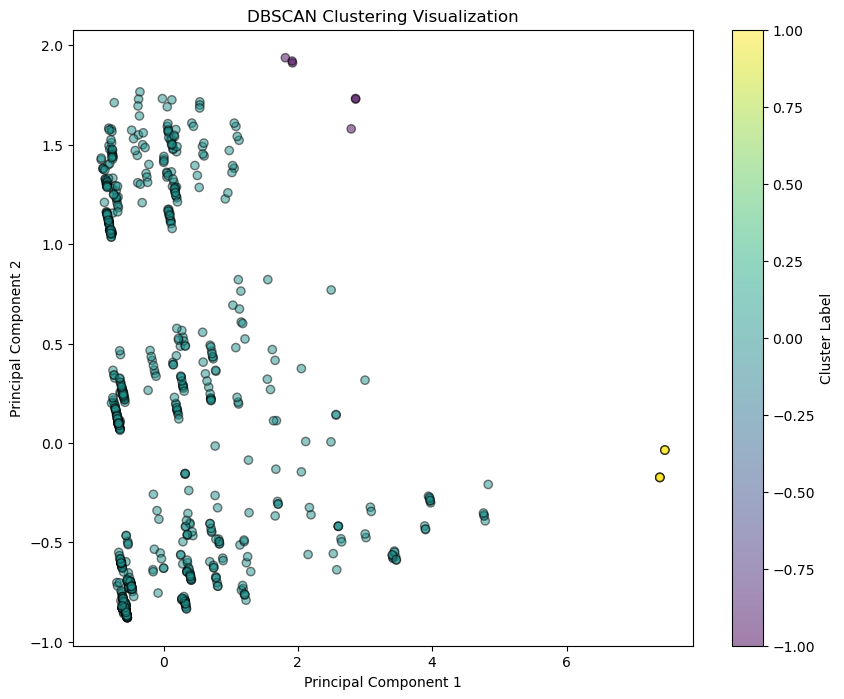

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import sklearn.metrics

# Load and preprocess the data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    labels = data['Survived']  # Assuming 'Survived' is the label
    data.drop(columns=['Name', 'Ticket', 'Cabin', 'Survived'], inplace=True)
    embarked = pd.get_dummies(data['Embarked'])
    scaler = MinMaxScaler(feature_range=(-1, 1))
    norm = pd.DataFrame(scaler.fit_transform(data[['Age', 'Fare']]), data.index, columns=['norm_Age', 'norm_Fare'])
    data = pd.concat([data.drop(columns=['Embarked', 'Age', 'Fare']), embarked, norm], axis=1)
    data['norm_Age'] = data['norm_Age'].fillna(data['norm_Age'].median())
    data['Sex'] = np.vectorize(lambda x: True if x == 'male' else False)(data['Sex'])
    data.set_index(['PassengerId'], inplace=True)
    data.sort_index(inplace=True)
    return data, labels

# Perform DBSCAN clustering and analyze
def dbscan_and_analyze(data, labels, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    
    # Check if all points are noise
    if len(set(clusters)) == 1 and -1 in clusters:
        print("All points classified as noise. Try adjusting eps and min_samples.")
        return

    # Analyze clusters
    comparison_df = pd.DataFrame({'Labels': labels, 'Clusters': clusters})
    cross_tab = pd.crosstab(comparison_df['Labels'], comparison_df['Clusters'])
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_classes = len(set(labels))

    print("Number of clusters (excluding noise):", num_clusters)
    print("Number of classes:", num_classes)
    print("Cross-tabulation of labels and clusters:\n", cross_tab)
    print("Are classes well separated into individual clusters?:", num_clusters == num_classes)
    print("Do some classes correspond to several clusters?:", cross_tab.apply(lambda x: x > 0).sum(axis=1).max() > 1)
    print("Are class labels completely irrelevant to the clusters formed?:", num_clusters != num_classes)
    
    # Visualize clusters
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.5, edgecolor='k')
    plt.title('DBSCAN Clustering Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()
    file_path = 'Titanic-Dataset.csv'  
titanic_data, labels = load_and_preprocess(file_path)
dbscan_and_analyze(titanic_data, labels, eps=1.5, min_samples=5)

C:\Users\Carlc\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


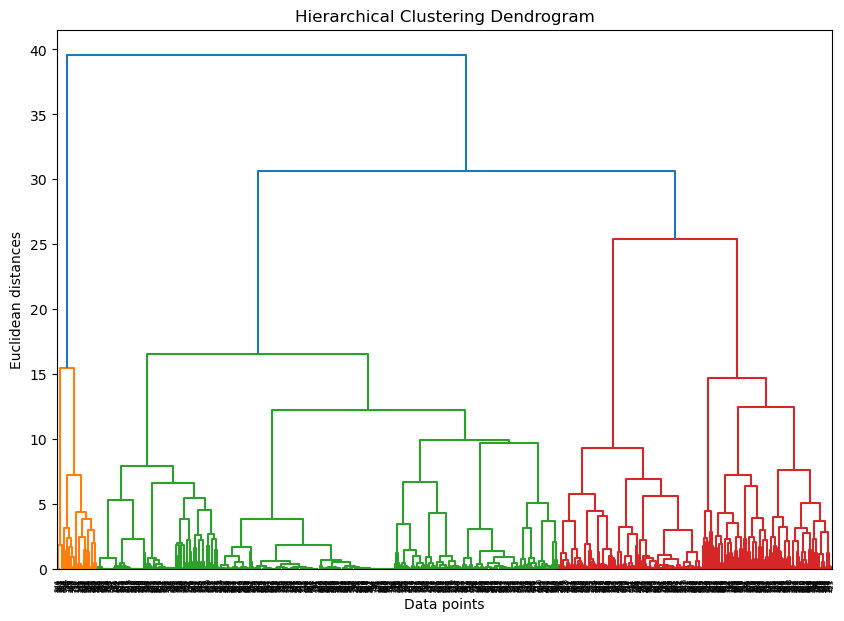

Clustered,0,1,All
Actual,,,
0,510,39,549
1,334,8,342
All,844,47,891


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Function to load and preprocess data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    labels = data['Survived']  # Assuming 'Survived' is the label
    data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'], inplace=True)

    # Normalize Age and Fare, and handle categorical Embarked
    embarked = pd.get_dummies(data['Embarked'], drop_first=True)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    norm = pd.DataFrame(scaler.fit_transform(data[['Age', 'Fare']]), data.index, columns=['norm_Age', 'norm_Fare'])
    data = pd.concat([data.drop(columns=['Embarked', 'Age', 'Fare']), embarked, norm], axis=1)
    data['norm_Age'] = data['norm_Age'].fillna(data['norm_Age'].median())
    data['Sex'] = np.vectorize(lambda x: True if x == 'male' else False)(data['Sex'])
    data.set_index(['PassengerId'], inplace=True)
    data.sort_index(inplace=True)

    return data.values, labels  # Convert DataFrame to numpy array for clustering

# Function to perform Hierarchical Clustering
def hierarchical_clustering(data, n_clusters=2):
    # Linkage matrix using Ward's method
    linkage_matrix = linkage(data, method='ward')
    
    # Fit Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = hc.fit_predict(data)
    
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data points')
    plt.ylabel('Euclidean distances')
    plt.show()
    
    return labels

# Load data
file_path = 'Titanic-Dataset.csv'  # Adjust path as necessary
data, original_labels = load_and_preprocess(file_path)

# Apply Hierarchical Clustering
cluster_labels = hierarchical_clustering(data)

# Analysis of clusters against original labels
pd.crosstab(original_labels, cluster_labels, rownames=['Actual'], colnames=['Clustered'], margins=True)


C:\Users\Carlc\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


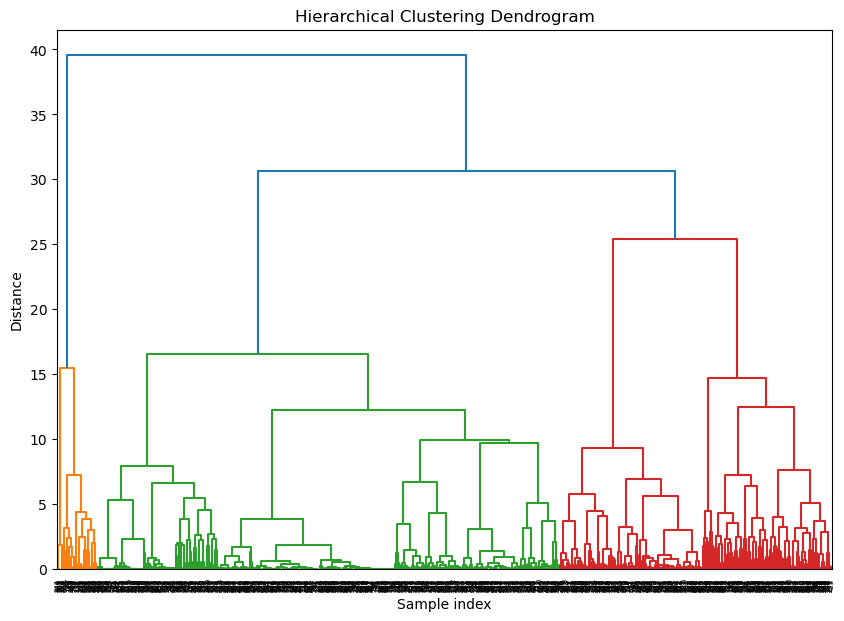

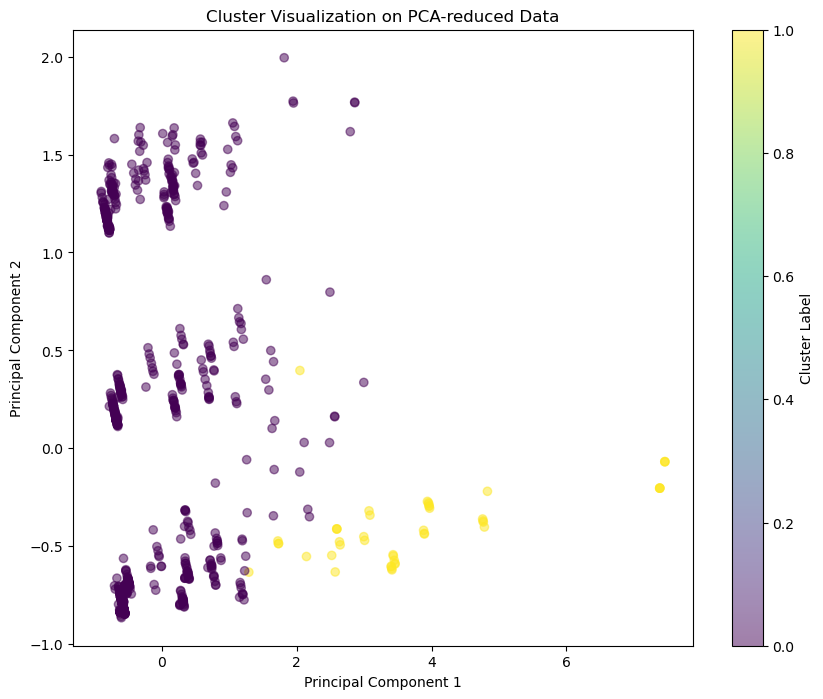

Clustered    0   1  All
Actual                 
0          510  39  549
1          334   8  342
All        844  47  891


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess the data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    labels = data['Survived']  # Assuming 'Survived' is the label
    data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'], inplace=True)

    # Normalize Age and Fare, and handle categorical Embarked
    embarked = pd.get_dummies(data['Embarked'], drop_first=True)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    norm = pd.DataFrame(scaler.fit_transform(data[['Age', 'Fare']]), data.index, columns=['norm_Age', 'norm_Fare'])
    data = pd.concat([data.drop(columns=['Embarked', 'Age', 'Fare']), embarked, norm], axis=1)
    data['norm_Age'] = data['norm_Age'].fillna(data['norm_Age'].median())
    data['Sex'] = np.vectorize(lambda x: True if x == 'male' else False)(data['Sex'])
    data.set_index(['PassengerId'], inplace=True)
    data.sort_index(inplace=True)

    return data, labels

# Apply PCA for visualization purposes
def apply_pca(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    return principal_components

# Perform Hierarchical Clustering and visualize
def hierarchical_clustering(data):
    linkage_matrix = linkage(data, method='ward')
    hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
    cluster_labels = hc.fit_predict(data)

    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

    # Plotting the PCA-reduced data
    principal_components = apply_pca(data)
    plt.figure(figsize=(10, 8))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.title('Cluster Visualization on PCA-reduced Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    return cluster_labels

# Load data
file_path = 'Titanic-Dataset.csv'  # Adjust the path as necessary
data, labels = load_and_preprocess(file_path)

# Apply Hierarchical Clustering
cluster_labels = hierarchical_clustering(data)

# Analyze clusters against original labels
results = pd.crosstab(labels, cluster_labels, rownames=['Actual'], colnames=['Clustered'], margins=True)
print(results)


C:\Users\Carlc\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


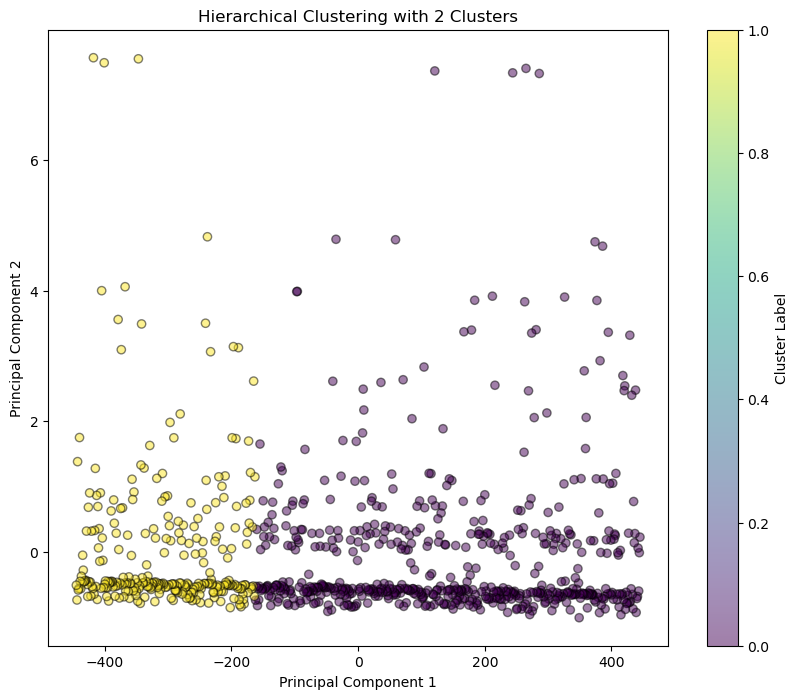

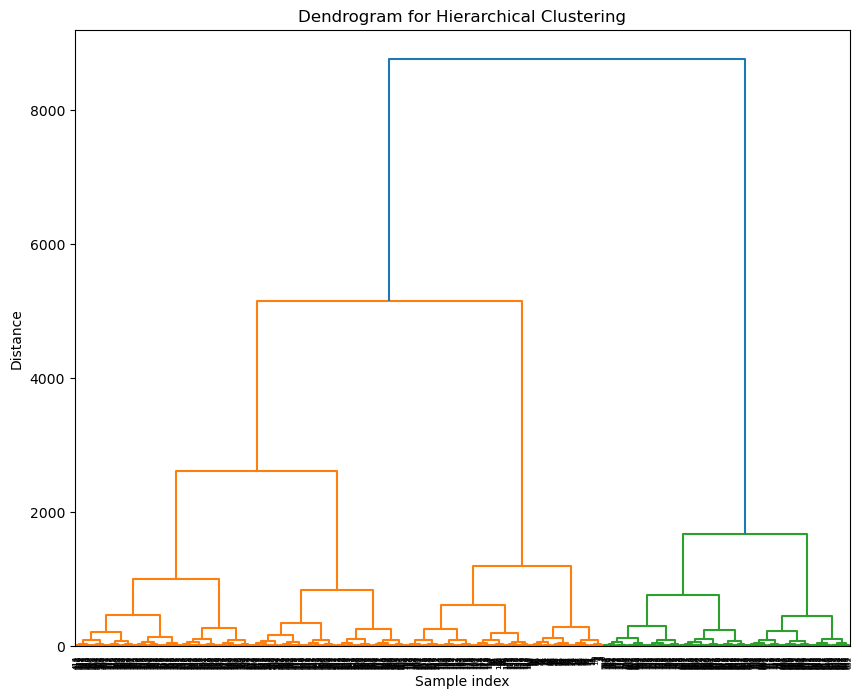

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load and preprocess the data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
    
    # Handling missing data
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    
    # Convert categorical to numerical
    embarked = pd.get_dummies(data['Embarked'])
    data = pd.concat([data.drop(columns=['Embarked']), embarked], axis=1)
    
    # Normalize data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    norm_cols = pd.DataFrame(scaler.fit_transform(data[['Age', 'Fare']]), columns=['norm_Age', 'norm_Fare'])
    data = pd.concat([data.drop(columns=['Age', 'Fare']), norm_cols], axis=1)
    
    data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    
    return data

# Apply PCA for dimensionality reduction
def apply_pca(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    return principal_components_df

# Perform Hierarchical Clustering and visualize the results
def perform_clustering(data):
    # Perform Hierarchical Clustering
    hier_clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
    hier_clusters = hier_clust.fit_predict(data)

    # Visualize the results on PCA-reduced data
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data['PC1'], data['PC2'], c=hier_clusters, cmap='viridis', alpha=0.5, edgecolor='k')
    plt.title('Hierarchical Clustering with 2 Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

    # Additionally, plot a dendrogram
    linked = linkage(data, 'ward')
    plt.figure(figsize=(10, 8))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

# Main execution
file_path = 'Titanic-Dataset.csv'
data = load_and_preprocess(file_path)
principal_components_df = apply_pca(data)
perform_clustering(principal_components_df)


C:\Users\Carlc\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


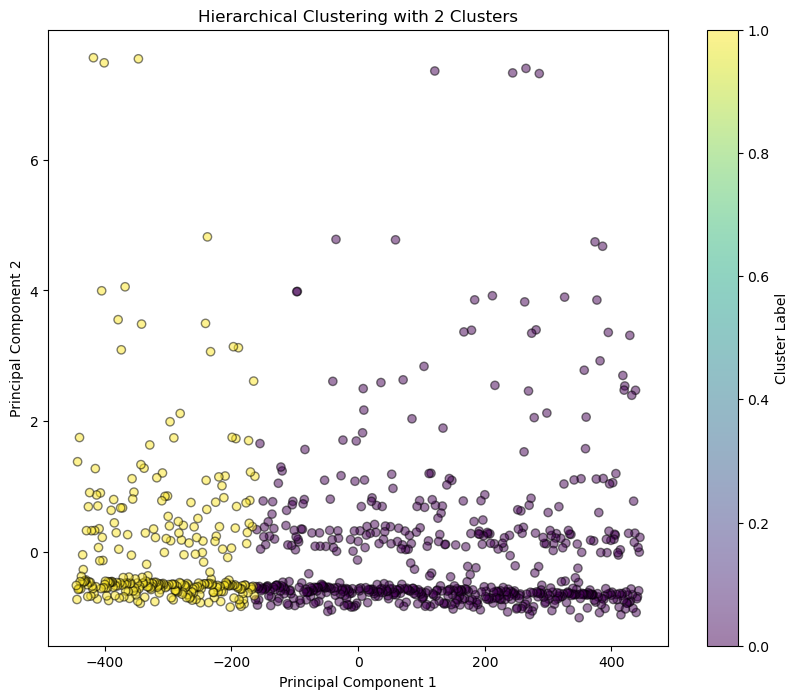

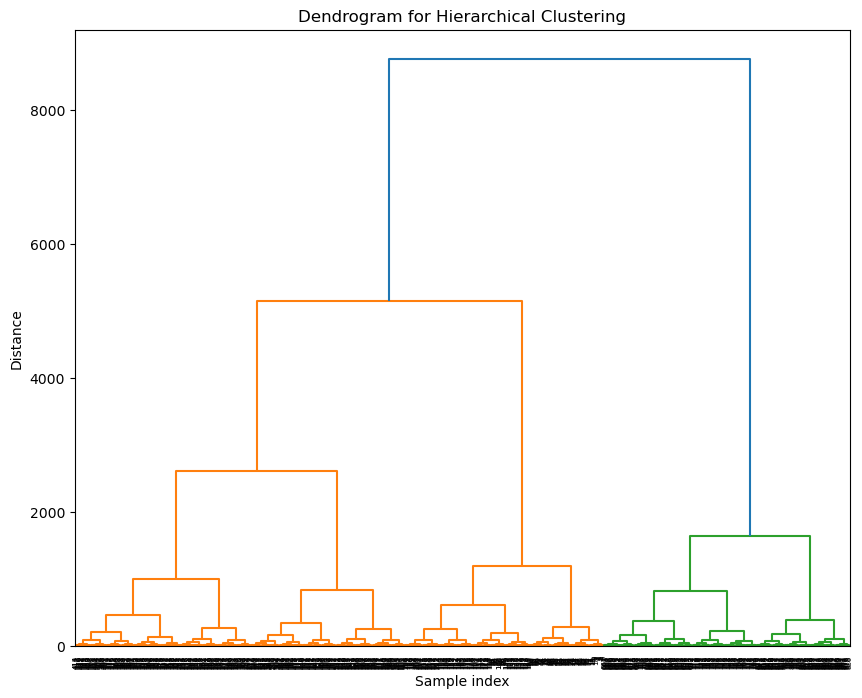

Cross-tabulation of labels and clusters:
 Clusters    0    1
Labels            
0         369  180
1         239  103
Are classes well separated into individual clusters? True
Are some classes more cohesive and some less? True
Do some classes correspond to several clusters? True
Are the class labels completely irrelevant to the clusters you see? False


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load and preprocess the data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    labels = data['Survived']  # Extract labels before preprocessing
    data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'], inplace=True)

    # Handling missing data
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Convert categorical to numerical
    embarked = pd.get_dummies(data['Embarked'])
    data = pd.concat([data.drop(columns=['Embarked']), embarked], axis=1)

    # Normalize data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    norm_cols = pd.DataFrame(scaler.fit_transform(data[['Age', 'Fare']]), columns=['norm_Age', 'norm_Fare'])
    data = pd.concat([data.drop(columns=['Age', 'Fare']), norm_cols], axis=1)

    data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    
    return data, labels

# Apply PCA for dimensionality reduction
def apply_pca(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    return principal_components_df

# Perform Hierarchical Clustering and visualize the results
def perform_clustering(data):
    hier_clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
    hier_clusters = hier_clust.fit_predict(data)

    # Visualize the results on PCA-reduced data
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data['PC1'], data['PC2'], c=hier_clusters, cmap='viridis', alpha=0.5, edgecolor='k')
    plt.title('Hierarchical Clustering with 2 Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

    # Additionally, plot a dendrogram
    linked = linkage(data, 'ward')
    plt.figure(figsize=(10, 8))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

    return hier_clusters

# Analyze the cluster results
def analyze_clusters(data, labels, clusters):
    # Create a DataFrame to compare clusters with labels
    comparison_df = pd.DataFrame({'Labels': labels, 'Clusters': clusters})
    crosstab = pd.crosstab(comparison_df['Labels'], comparison_df['Clusters'])

    print("Cross-tabulation of labels and clusters:\n", crosstab)
    print("Are classes well separated into individual clusters?", all(crosstab.max(axis=0) > crosstab.min(axis=0)))
    print("Are some classes more cohesive and some less?", any(crosstab.std(axis=1) > 0))
    print("Do some classes correspond to several clusters?", any(crosstab.max(axis=1) > 1))
    print("Are the class labels completely irrelevant to the clusters you see?", crosstab.shape[0] != 2)

# Main execution
file_path = 'Titanic-Dataset.csv'
data, labels = load_and_preprocess(file_path)
principal_components_df = apply_pca(data)
clusters = perform_clustering(principal_components_df)
analyze_clusters(data, labels, clusters)
